In [104]:
import pandas as pd
import yfinance as yf
from datetime import timedelta, date, datetime
import os
import datetime as dt

# 1. 
-update_local_datasets(symbols, path) # using path as the root folder, compare current stored data for symbols with what is available from yfinance, download additional (most recent) data as necessary, storing in path as csv (or pickle).

In [6]:
def get_path():
    if not os.path.exists('dataset'):
        os.makedirs('dataset')
    else:
        cwd = os.getcwd()
        
    return os.path.join(cwd,'dataset')

path = get_path()

In [54]:
path

'/Users/brigittekudor/volume-forecasting/dataset'

In [23]:
os.chdir(path)
files = [f for f in os.listdir('.') if os.path.isfile(f)]
files

[]

In [12]:
def update_local_datasets(tickers,path):
    #go to current working directory and get file names
    os.chdir(path)
    #files = [f for f in os.listdir('.') if os.path.isfile(f)]
    #open csv files and scan for symbols
    for t in tickers:
            # if file does not exist create new file with ticker:
        if not os.path.isfile('{}.csv'.format(t)):
                # download latest 1 min data for the past seven days(according to streaming allowance)
            start_date = (date.today() - timedelta(7)).strftime('%Y-%m-%d')
            end_date = date.today().strftime('%Y-%m-%d')
            ticker_obj = yf.Ticker(t)
            t_df = ticker_obj.history(start = start_date, end = end_date, interval = '1m')
            t_df['ticker'] = t
            t_file = '{}.csv'.format(t)
            t_df.to_csv(t_file)
            # Else exists, open up the correct file, get latest data and append to file
        else:
            file = '{}.csv'.format(t)
            df = pd.read_csv(file, index_col =0, header = 0)
            df.index = pd.to_datetime(df.index)
            #check latest date and pull new data
            latest_date = df.index[-1].date()
            start_date = (latest_date + timedelta(1)).strftime('%Y-%m-%d')
            today = date.today()
            ticker_obj = yf.Ticker(t)
            temp_df = ticker_obj.history(start = start_date, end = today, interval = '1m')
            temp_df['ticker'] = t
            temp_df.to_csv(f, mode = 'a', header = False)

In [36]:
# if file does not exist write header 
if not os.path.isfile('filename.csv'):
    df.to_csv('filename.csv', header='column_names')
else: #else it exists so append without writing the header
    df.to_csv('filename.csv', mode='a', header=False)

In [61]:
ticker_obj = yf.Ticker('AMZN')
amzn_df = ticker_obj.history(start = '2020-11-16', end = '2020-11-20', interval = '1m')
amzn_df['ticker'] = 'AMZN'
amzn_df.to_csv('AMZN.csv')

In [50]:
df = pd.read_csv('AMZN.csv', index_col = 0,header = 0)
df.head()
# Converting the index as date
df.index = pd.to_datetime(df.index)
latest_date = df.index[-1].date()
start_date = (latest_date + timedelta(1)).strftime('%Y-%m-%d')
ticker_obj = yf.Ticker('')
temp_df = ticker_obj.history(start = start_date, end = '2020-11-26', interval = '1m')
temp_df['ticker'] = ''
temp_df.to_csv('MSFT.csv', mode = 'a', header = False )

In [13]:
cwd = os.getcwd()
base_dir  = os.path.dirname(cwd)
working_file = os.path.join(base_dir, 'yf_min_data.csv')
df = pd.read_csv('yf_min_data.csv')

## Stocks

5 pharma: PSE, JNJ, NVS, MRK, AZN

5 Oil and Gas: SNP, PTR, BP, XOM, RDS

5 Tech: AMZN, TSLA, MSFT, AAPL, ZOM

5 Banking: GS, JPM, WFC, FRC, HDB

In [81]:
tickers = ['PSE', 'JNJ', 'NVS', 'MRK', 'AZN', 'SNP', 'PTR', 'BP', 'XOM', 'AMZN', 'TSLA', 'MSFT',
          'AAPL', 'ZOM', 'GS', 'JPM', 'WFC', 'FRC', 'HDB', 'RDS']

In [86]:
#update_local_datasets(tickers,path)

In [30]:
# Change this so it saves datasets per ticker not in one master df

def get_stock_data(ticker_list, num_days):
    
    def daterange(d1,d2):
        return (d1 + timedelta(days = i) for i in range ((d2-d1).days +1))

    master_df = pd.DataFrame()
    for ticker in ticker_list:
        ticker_obj = yf.Ticker(ticker)
        today = date.today()
        start_date = today - timedelta(days = num_days)
        ticker_df = pd.DataFrame()
        for d in daterange(start_date, today):
            start_dt = d.strftime('%Y-%m-%d')
            end_dt = (d + timedelta(1)).strftime('%Y-%m-%d')
            print(f'start:{start_dt}, end {end_dt}')
            temp_df = ticker_obj.history(start = start_dt, end = end_dt, interval = '1m')
            temp_df['ticker'] = ticker
            print('temp df shape:', temp_df.shape)
            ticker_df = ticker_df.append(temp_df)
            ticker_df.to_csv('{}.csv'.format(ticker))
        master_df = master_df.append(ticker_df)
        print('master df shape:', master_df.shape)
        

    return master_df


ticker_list = [ 'MSFT']

num_days = 10
df = get_stock_data(ticker_list, num_days)

start:2020-11-17, end 2020-11-18
temp df shape: (389, 8)
start:2020-11-18, end 2020-11-19
temp df shape: (390, 8)
start:2020-11-19, end 2020-11-20
temp df shape: (391, 8)
start:2020-11-20, end 2020-11-21
temp df shape: (390, 8)
start:2020-11-21, end 2020-11-22
- MSFT: No data found for this date range, symbol may be delisted
temp df shape: (0, 7)
start:2020-11-22, end 2020-11-23
- MSFT: No data found for this date range, symbol may be delisted
temp df shape: (0, 7)
start:2020-11-23, end 2020-11-24
temp df shape: (390, 8)
start:2020-11-24, end 2020-11-25
temp df shape: (389, 8)
start:2020-11-25, end 2020-11-26
temp df shape: (387, 8)
start:2020-11-26, end 2020-11-27
- MSFT: No data found for this date range, symbol may be delisted
temp df shape: (0, 7)
start:2020-11-27, end 2020-11-28
- MSFT: No data found for this date range, symbol may be delisted
temp df shape: (0, 7)
master df shape: (2726, 9)


In [29]:
last_date = df.index[-1].date().strftime('%Y-%m-%d')
last_date

'2020-11-25'

In [52]:
start_date = (date.today() - timedelta(7)).strftime('%Y-%m-%d')
end_date = date.today().strftime('%Y-%m-%d')
start_date


'2020-11-20'

# 2

- get_available_datasets(training_window, test_window, path) # return list of symbols with possible start_dates, having specified training_window (in days) and test window (in days). (Start date = start of test window. Training window immediately precedes this).

- get_dataset(symbol, start_date, training_window, test_window, path) # return a data frame with test data specified by start_date, and training data immediately before this.

In [92]:
def get_available_datasets(training_window, test_window, path):
    
    def daterange(startdate, enddate, steps):
        numdays = (enddate-startdate).days 
        for x in range (0, numdays, steps):
            yield startdate + dt.timedelta(days = x)
    
    #go to current working directory and get file names
    os.chdir(path)
    files = [f for f in os.listdir('.') if os.path.isfile(f)]
    all_possibilities = []
    for f in files:
        try:
            df = pd.read_csv(f, index_col =0, header =0)
            df.index = pd.to_datetime(df.index)
            ticker = df['ticker'].values[1]
            #check latest date and pull new data
            latest_date = df.index[-1].date()
            first_date = df.index[0].date()
            diff = latest_date-first_date
            start_dates = []
            # check if we have enough data for the defined training and test window
            total_days_required = training_window + test_window
            total_days_available = diff.days
            if total_days_required <= total_days_available:
                start_date = first_date + timedelta (training_window)
                for day in daterange(start_date,latest_date,total_days_required):
                    start_dates.append(day.strftime('%Y-%m-%d'))
            ticker_dict = {ticker:start_dates}
        except ValueError:
            print("Dataset {}, doesn't have sufficient values".format(f))
        all_possibilities.append(ticker_dict)   
    return all_possibilities

In [93]:
get_available_datasets(2,1,path)

Dataset RDS.csv, doesn't have sufficient values


[{'NVS': ['2020-11-25']},
 {'SNP': ['2020-11-25']},
 {'SNP': ['2020-11-25']},
 {'BP': ['2020-11-25']},
 {'MRK': ['2020-11-25']},
 {'AMZN': ['2020-11-25']},
 {'MSFT': ['2020-11-25']},
 {'ZOM': ['2020-11-25']},
 {'HDB': ['2020-11-25']},
 {'AZN': ['2020-11-25']},
 {'FRC': ['2020-11-25']},
 {'XOM': ['2020-11-25']},
 {'WFC': ['2020-11-25']},
 {'GS': ['2020-11-25']},
 {'PTR': ['2020-11-25']},
 {'JPM': ['2020-11-25']},
 {'TSLA': ['2020-11-25']},
 {'PSE': []},
 {'AAPL': ['2020-11-25']},
 {'JNJ': ['2020-11-25']}]

In [111]:
def get_dataset(symbol, start_date, training_window, test_window, path):
    #go to current working directory and get file names
    os.chdir(path)
    csv = '{}.csv'.format(symbol)
    df = pd.read_csv(csv, index_col = 0, header = 0)
    df.index = pd.to_datetime(df.index)
    df.index = df.index.tz_localize(None)
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    training_start_date = start_date - timedelta(training_window)
    test_end = start_date + timedelta(test_window)
    train_mask = (df.index >= training_start_date) & (df.index < start_date)
    test_mask = (df.index >= start_date) & (df.index < test_end)
    train_df = df[train_mask]
    test_df = df[test_mask]
    return train_df, test_df

In [112]:
train, test = get_dataset('AAPl', '2020-11-25', 2, 1, path)

In [113]:
train

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Datetime,,,,,,,,
2020-11-23 09:30:00,117.250000,117.250000,117.199997,117.199997,3019162,0,0,AAPL
2020-11-23 09:31:00,117.169998,117.370003,117.080002,117.211304,619094,0,0,AAPL
2020-11-23 09:32:00,117.199997,117.309998,117.120003,117.150002,468029,0,0,AAPL
2020-11-23 09:33:00,117.150002,117.290001,117.129997,117.226700,417170,0,0,AAPL
2020-11-23 09:34:00,117.220001,117.410004,117.199997,117.370003,589356,0,0,AAPL
...,...,...,...,...,...,...,...,...
2020-11-24 15:55:00,115.190002,115.269997,115.169998,115.170097,502865,0,0,AAPL
2020-11-24 15:56:00,115.169998,115.169998,114.970001,115.014999,562914,0,0,AAPL
2020-11-24 15:57:00,115.019997,115.150002,114.995003,115.149902,565351,0,0,AAPL


In [114]:
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Datetime,,,,,,,,
2020-11-25 09:30:00,115.550003,115.849998,115.500000,115.714798,3159169,0,0,AAPL
2020-11-25 09:31:00,115.720001,115.750000,115.320000,115.349998,568034,0,0,AAPL
2020-11-25 09:32:00,115.349998,115.449997,115.169998,115.430000,497336,0,0,AAPL
2020-11-25 09:33:00,115.419998,115.730003,115.419998,115.550003,529254,0,0,AAPL
2020-11-25 09:34:00,115.550003,115.779999,115.349998,115.739998,510870,0,0,AAPL
...,...,...,...,...,...,...,...,...
2020-11-25 15:55:00,116.010002,116.089996,115.959999,116.070000,401831,0,0,AAPL
2020-11-25 15:56:00,116.070000,116.074997,115.989998,116.019997,377861,0,0,AAPL
2020-11-25 15:57:00,116.025597,116.029999,115.949997,115.989998,315956,0,0,AAPL


In [14]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]


['NVS.csv',
 'SNP.csv',
 'RDS.csv',
 'BP.csv',
 'MRK.csv',
 'AMZN.csv',
 'MSFT.csv',
 'ZOM.csv',
 'HDB.csv',
 'AZN.csv',
 'FRC.csv',
 'XOM.csv',
 'WFC.csv',
 'GS.csv',
 'PTR.csv',
 'JPM.csv',
 'TSLA.csv',
 'PSE.csv',
 'AAPL.csv',
 'JNJ.csv']

In [15]:
df = pd.read_csv('AAPL.csv', index_col =0, header = 0)
df.index = pd.to_datetime(df.index)
#check latest date and pull new data
latest_date = df.index[-1].date()
start_date = df.index[0].date()
print(start_date, latest_date)

2020-11-23 2020-11-27


In [17]:
def daterange(d1,d2):
        return (d1 + timedelta(days = i) for i in range ((d2-d1).days +1))

for day in daterange(start_date, latest_date):
    print(day)

2020-11-23
2020-11-24
2020-11-25
2020-11-26
2020-11-27


In [41]:
x = (latest_date - start_date).days
x

4

In [25]:

def daterange(startdate, enddate, steps): 
    """Yields dates in increments of steps days from startdate to enddate"""
    numdays = (enddate-startdate).days 
    for x in range (0, numdays, steps):
        yield startdate + datetime.timedelta(days = x)

In [26]:

for x in daterange(start_date, latest_date, 2):
    print(x)

2020-11-23
2020-11-25


In [94]:
csv = '{}.csv'.format('AAPL')

In [95]:
csv

'AAPL.csv'

In [97]:
mask = df.index > start_date

TypeError: Invalid comparison between dtype=datetime64[ns] and date

In [ ]:
mask = (df['date'] > start_date) & (df['date'] <= end_date)

In [5]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [6]:
ticker = ['TSLA']
num_days = 29

df = get_stock_data(ticker, num_days)
df.head()

start:2020-10-13, end 2020-10-14
temp df shape: (388, 8)
start:2020-10-14, end 2020-10-15
temp df shape: (390, 8)
start:2020-10-15, end 2020-10-16
temp df shape: (390, 8)
start:2020-10-16, end 2020-10-17
temp df shape: (388, 8)
start:2020-10-17, end 2020-10-18
- TSLA: No data found for this date range, symbol may be delisted
temp df shape: (0, 7)
start:2020-10-18, end 2020-10-19
- TSLA: No data found for this date range, symbol may be delisted
temp df shape: (0, 7)
start:2020-10-19, end 2020-10-20
temp df shape: (389, 8)
start:2020-10-20, end 2020-10-21
temp df shape: (389, 8)
start:2020-10-21, end 2020-10-22
temp df shape: (389, 8)
start:2020-10-22, end 2020-10-23
temp df shape: (390, 8)
start:2020-10-23, end 2020-10-24
temp df shape: (390, 8)
start:2020-10-24, end 2020-10-25
- TSLA: No data found for this date range, symbol may be delisted
temp df shape: (0, 7)
start:2020-10-25, end 2020-10-26
- TSLA: No data found for this date range, symbol may be delisted
temp df shape: (0, 7)
sta

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Adj Close
2020-10-13 09:30:00-04:00,442.140015,442.140015,441.850006,441.875000,1151825.0,0.0,0.0,TSLA,NaN
2020-10-13 09:31:00-04:00,441.750000,442.980011,441.299988,442.279999,198591.0,0.0,0.0,TSLA,NaN
2020-10-13 09:32:00-04:00,442.268707,442.281586,441.454987,441.850006,117819.0,0.0,0.0,TSLA,NaN
2020-10-13 09:33:00-04:00,442.010010,443.000000,441.500000,442.270111,148173.0,0.0,0.0,TSLA,NaN
2020-10-13 09:34:00-04:00,442.489990,442.739990,441.010010,442.019989,164946.0,0.0,0.0,TSLA,NaN


Timestamp('2020-11-25 15:59:00-0500', tz='America/New_York')

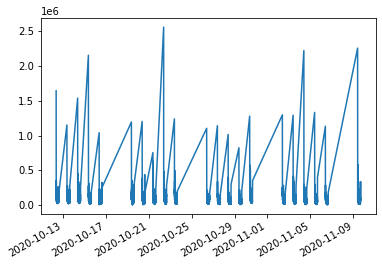

In [11]:
import matplotlib.pyplot as plt

df['Volume'].plot()

In [7]:
#initialize Prophet 
m = Prophet()

In [23]:
df = df[['Volume']].copy()
tsla_df = df.tz_localize(None)
tsla_df['date'] = tsla_df.index
tsla_df.reset_index(drop = True, inplace = True)
tsla_df.rename(columns = {'Volume':'y', 'date':'ds'}, inplace = True)

In [26]:
m.fit(tsla_df)
future = m.make_future_dataframe(periods=300, freq='min')

Exception: Prophet object can only be fit once. Instantiate a new object.

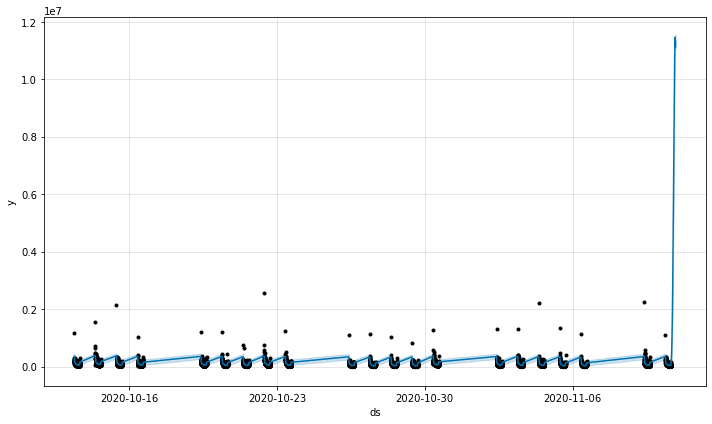

In [27]:
fcst = m.predict(future)
fig = m.plot(fcst)

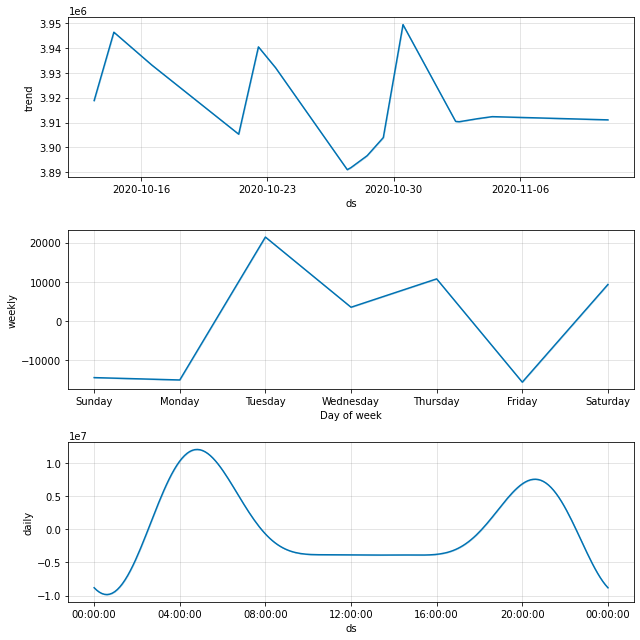

In [28]:
fig = m.plot_components(fcst)
